In [60]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.metrics import accuracy_score

In [61]:
# read data
X = pd.read_csv('../DATA/X_data.csv')
y = pd.read_csv('../DATA/y_data.csv')


### Thực hiện trên tệp dữ liệu đã chuẩn hóa

### PCA

In [62]:
# Standardize data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [63]:
pca = PCA(n_components=16)
X_t = pca.fit_transform(X_scaled)



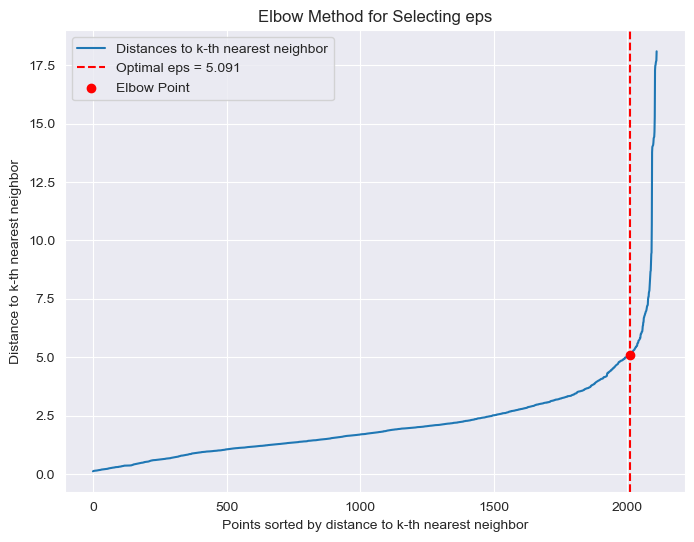

Optimal eps: 5.090915004608133


In [64]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# Số lượng lân cận k (k-th neighbor)
min_samples = pca.n_components +1 # Sử dụng số thành phần PCA hoặc giá trị tùy chỉnh
neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(X_t)  # X_t là dữ liệu sau khi giảm chiều với PCA
distances, indices = nbrs.kneighbors(X_t)

# Tính khoảng cách tới k-th nearest
distances = np.sort(distances, axis=0)[:, -1]


# Sử dụng Kneedle Algorithm để tìm điểm gập (elbow)
kneedle = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
eps = distances[kneedle.knee]  # Giá trị eps tại "elbow"

# Vẽ đồ thị và trực quan hóa eps tối ưu
plt.figure(figsize=(8, 6))
plt.plot(distances, label="Distances to k-th nearest neighbor")
plt.axvline(x=kneedle.knee, color='r', linestyle='--', label=f"Optimal eps = {eps:.3f}")
plt.scatter(kneedle.knee, eps, color='red', label="Elbow Point", zorder=5)
plt.title("Elbow Method for Selecting eps")
plt.xlabel("Points sorted by distance to k-th nearest neighbor")
plt.ylabel("Distance to k-th nearest neighbor")
plt.legend()
plt.show()

# In giá trị eps
print(f"Optimal eps: {eps}")


In [65]:
# DBScan
dbscan = DBSCAN(eps=eps, min_samples=min_samples + 1)  # min_samples = minPts
dbscan.fit(X_t)


DBSCAN(eps=np.float64(5.090915004608133), min_samples=18)

In [66]:
labels = dbscan.fit_predict(X_t)
labels

array([ 0, -1,  1, ...,  0,  0,  0])

In [67]:
# gia tri cac nhan
print(np.unique(labels))

[-1  0  1  2  3  4]


Number of clusters: 5
Number of noise points: 56


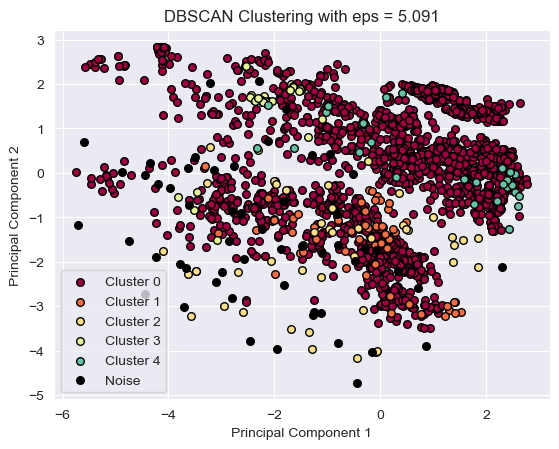

In [68]:
# visualizing the clusters

# Số cụm và các điểm nhiễu
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Trực quan hóa các cụm
unique_labels = set(labels)

# Tạo danh sách màu sắc cho các cụm
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Điểm nhiễu (noise) được gắn nhãn là -1
        color = [0, 0, 0, 1]  # Màu đen cho noise

    # Lấy các điểm thuộc về cụm hiện tại
    cluster_points = (labels == label)
    plt.scatter(
        X_t[cluster_points, 0], X_t[cluster_points, 1],
        c=[color], label=f"Cluster {label}" if label != -1 else "Noise",
        s=30, edgecolor='k'
    )

plt.title(f"DBSCAN Clustering with eps = {eps:.3f}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


In [69]:
# accuracy
y_pred = labels
print('Accuracy: ', accuracy_score(y, y_pred))


Accuracy:  0.13121743249644718
